In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('./data/final_data_after_winsorization.csv', index_col='행정동명')
data.fillna(0, inplace=True)
data.head(2)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,총_20_30대_(수),총_40_50대_(수),총_60대이상_(수),총_10대,총_20_30대,총_40_50대,총_60대이상,유치원_초등학교_(수),유치원_초등학교,거주_유동_인구당_매출액
행정동명,,,,,,,,,,,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,449,118,10.0,0.0,1.0,...,15010,17080,11642,0.095664,0.272572,0.310162,0.211411,3.0,0.000054,26.850496
가락2동,12375,3568,2746,2825,2641,453,142,3.0,0.0,4.0,...,17364,20426,14158,0.104766,0.277141,0.326013,0.225971,6.0,0.000096,35.834189


In [3]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']
data = data[features]
print(f'사용하는 컬럼수: {len(features)}개')

사용하는 컬럼수: 14개


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))
scaled_df.index = data.index
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
행정동명,,,,,,,,,,,,,,
가락1동,0.014204,0.076923,0.0,0.025989,0.116279,0.0,0.085682,0.105911,0.125300,0.639775,0.426207,0.408414,0.457904,0.112284
가락2동,0.014204,0.346154,0.0,0.035016,0.034884,0.0,0.088504,0.182266,0.220257,0.745585,0.466991,0.415310,0.489702,0.269226


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_df)
pca_result = pd.DataFrame((pca.transform(scaled_df)))

num_of_principal = pca_result.shape[1] 
print('주성분의 개수:', num_of_principal)
pca_result.index = data.index  
pca_result.head()

주성분의 개수: 2


,0,1
행정동명,,
가락1동,0.313751,-0.194982
가락2동,0.416137,-0.051024
가락본동,0.156997,0.112429
가리봉동,-0.612605,0.107408
가산동,-0.117360,0.795470


In [7]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

주성분의 설명력
제 1주성분 : 0.3031472103177469
제 2주성분 : 0.24872724867827828


In [8]:
pca_result_T = pca_result.reset_index().copy()
pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]
pca_result_T.columns

Index(['V_행정동명', 'V_0', 'V_1'], dtype='object')

<Axes: xlabel='V_0', ylabel='V_1'>

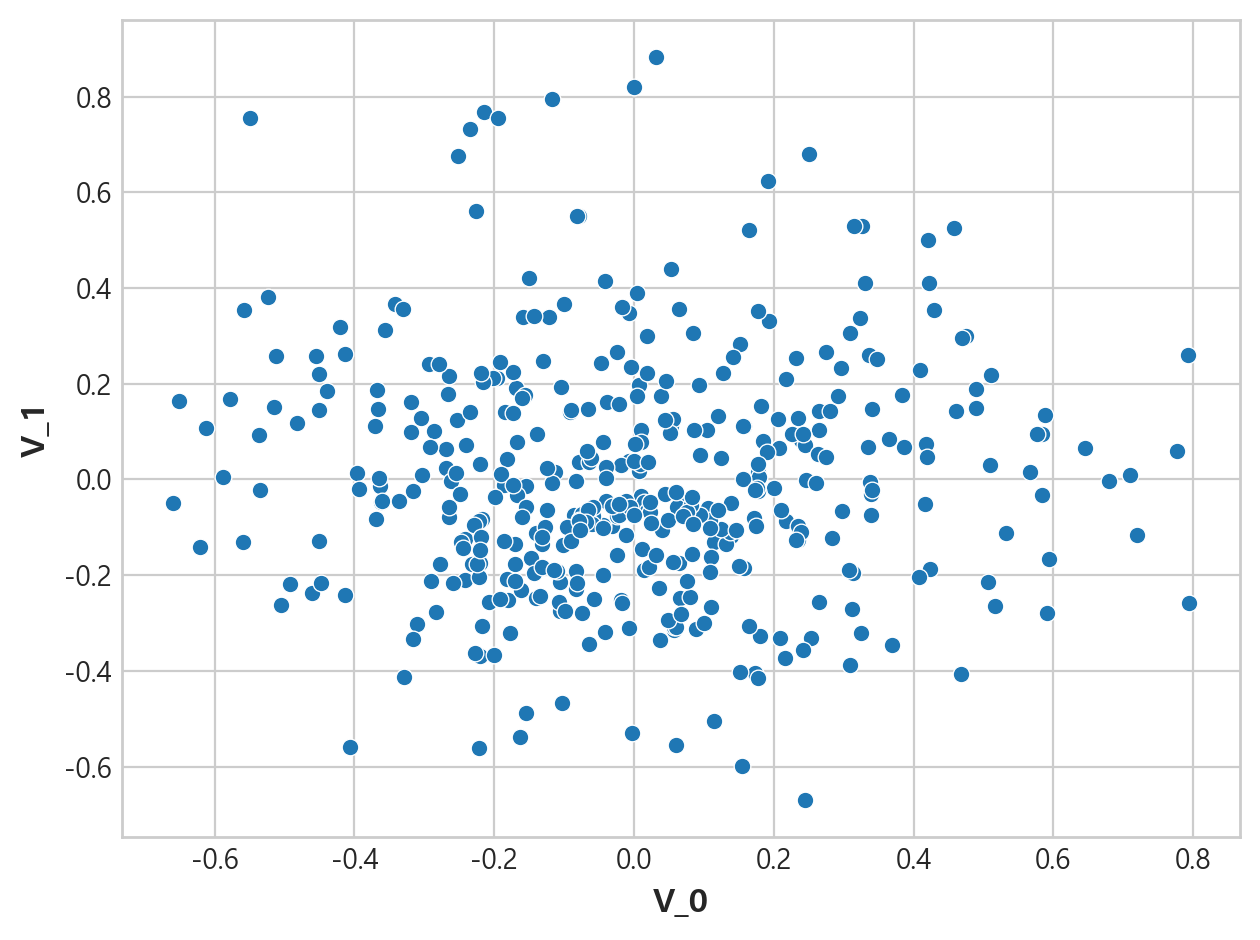

In [9]:
import seaborn as sns
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1')

In [10]:
pca_result_T.sort_values('V_0').head(10)

,V_행정동명,V_0,V_1
394,필동,-0.660355,-0.048411
312,을지로동,-0.651767,0.163756
91,둔촌1동,-0.621720,-0.141444
3,가리봉동,-0.612605,0.107408
345,장충동,-0.588089,0.006152
355,종로5.6가동,-0.578160,0.168944
376,창신1동,-0.560045,-0.131278
30,광희동,-0.557756,0.354156
354,종로1.2.3.4가동,-0.549133,0.754336
239,신당동,-0.536105,0.093052


In [11]:
pca_result_T.sort_values('V_0').tail(10)

,V_행정동명,V_0,V_1
27,공릉2동,0.587460,0.135497
332,잠실2동,0.591298,-0.279213
46,길음1동,0.594345,-0.167067
141,방화1동,0.645798,0.065415
302,우장산동,0.679094,-0.004029
259,신정3동,0.710345,0.008414
310,위례동,0.719739,-0.116289
370,진관동,0.776705,0.060339
275,양재1동,0.793389,0.260735
116,목5동,0.794465,-0.258356


In [12]:
pca_result_T.sort_values('V_1').head(10)

,V_행정동명,V_0,V_1
72,대치1동,0.244730,-0.669822
126,반포2동,0.154866,-0.598937
111,명일2동,-0.221879,-0.561661
15,개포1동,-0.406954,-0.559747
21,고덕1동,0.060718,-0.554496
336,잠실7동,-0.163287,-0.537135
327,일원본동,-0.002148,-0.529100
292,오륜동,0.115086,-0.505157
117,무악동,-0.155221,-0.487748
272,암사3동,-0.103116,-0.466800


In [13]:
pca_result_T.sort_values('V_1').tail(10)

,V_행정동명,V_0,V_1
386,청룡동,0.191352,0.623837
417,화양동,-0.251832,0.675537
5,가양1동,0.250883,0.679489
243,신림동,-0.234859,0.731466
354,종로1.2.3.4가동,-0.549133,0.754336
280,역삼1동,-0.194931,0.755175
263,신촌동,-0.214869,0.766856
4,가산동,-0.117360,0.795470
287,영등포동,-0.000651,0.819616
189,서교동,0.031945,0.882373


In [14]:
pca_result_T

,V_행정동명,V_0,V_1
0,가락1동,0.313751,-0.194982
1,가락2동,0.416137,-0.051024
2,가락본동,0.156997,0.112429
3,가리봉동,-0.612605,0.107408
4,가산동,-0.117360,0.795470
...,...,...,...
421,효창동,-0.220963,-0.147393
422,후암동,-0.173475,-0.012163
423,휘경1동,-0.266365,0.178560
424,휘경2동,0.044370,0.123468


In [15]:
pd.DataFrame(data=pca.components_, columns=scaled_df.columns).T

,0,1
0,-0.080590,0.094684
1,0.271876,0.090130
2,0.001329,0.056105
3,-0.110020,-0.060351
4,0.009614,0.053731
5,-0.008139,0.057883
6,0.082841,0.304039
7,0.026723,0.285493
8,-0.094357,-0.190817
9,0.808800,0.349410


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

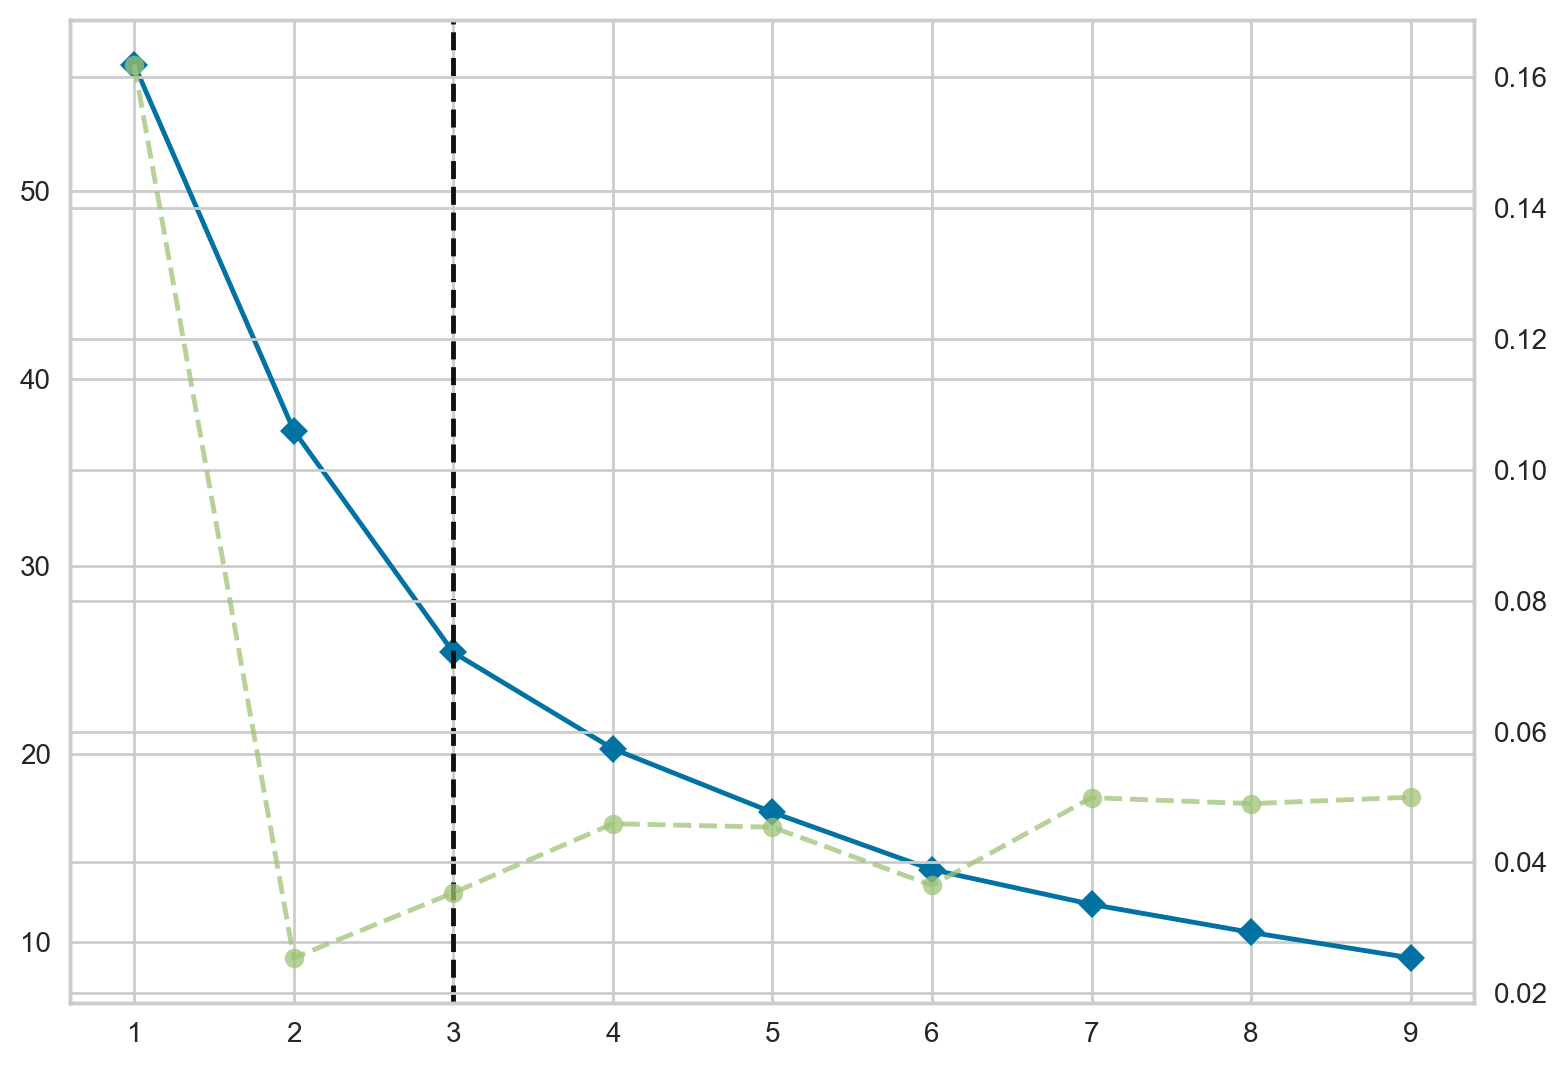

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


#엘보우 최적 클러스터 수 정하기
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10), n_init=10)
visualizer.fit(pca_result)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

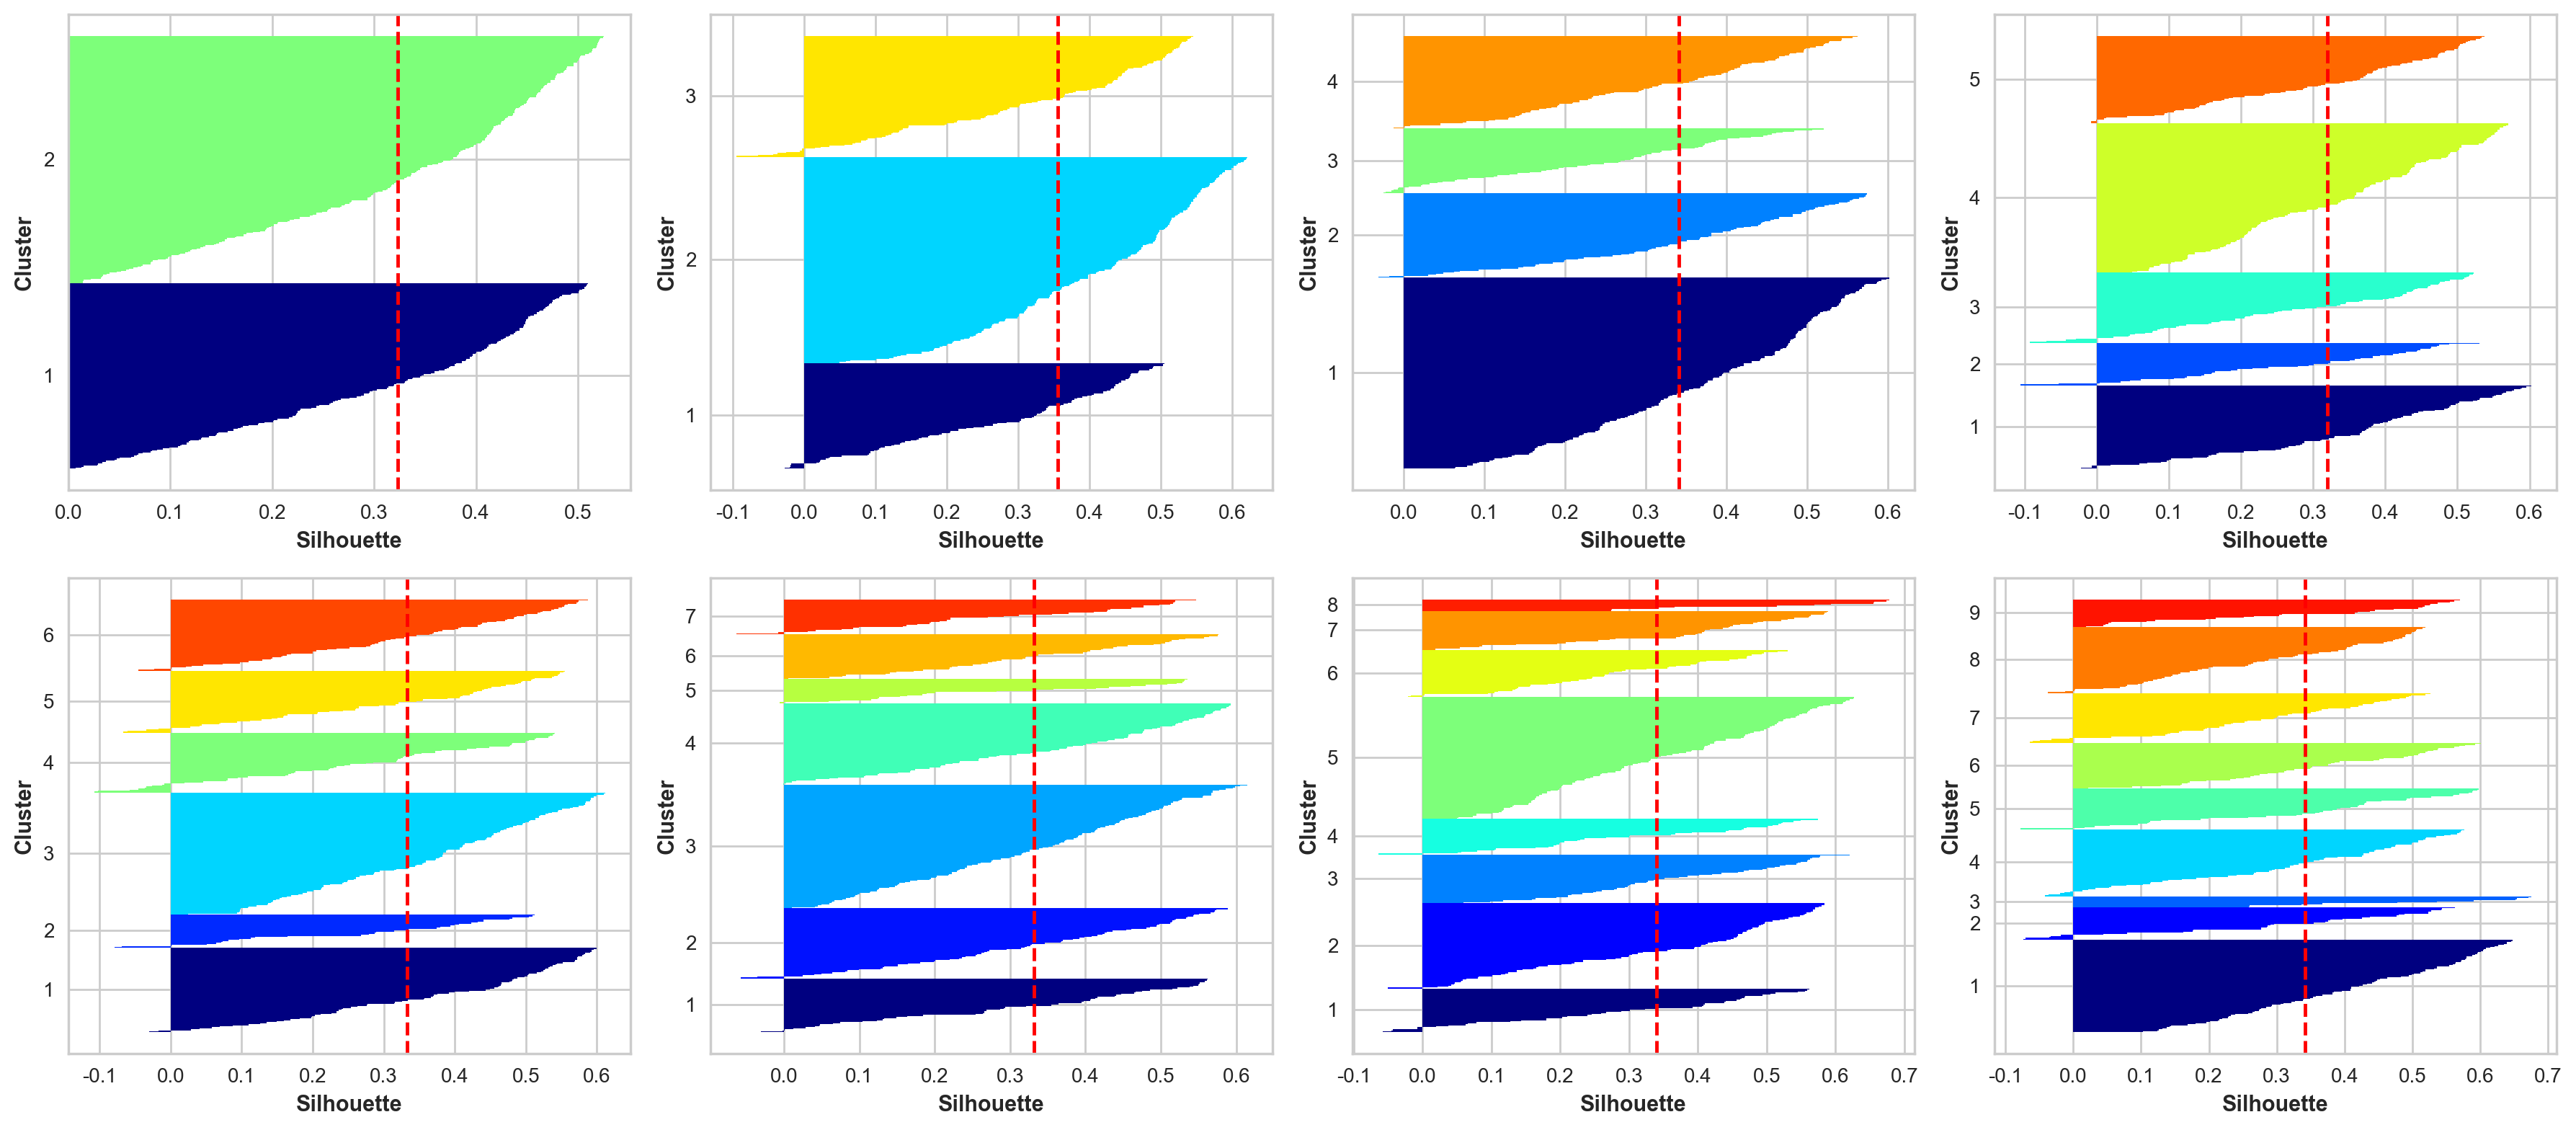

In [19]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(18,8))
for i, n_cluster in enumerate(n_clusters):
    kmeans= KMeans(n_clusters=n_cluster,
                   n_init=10,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_result)

    
    plt.subplot(nrows, ncols, i+1)
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_result, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    
plt.show()

In [20]:
pca_result.head(2)

,0,1
행정동명,,
가락1동,0.313751,-0.194982
가락2동,0.416137,-0.051024


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


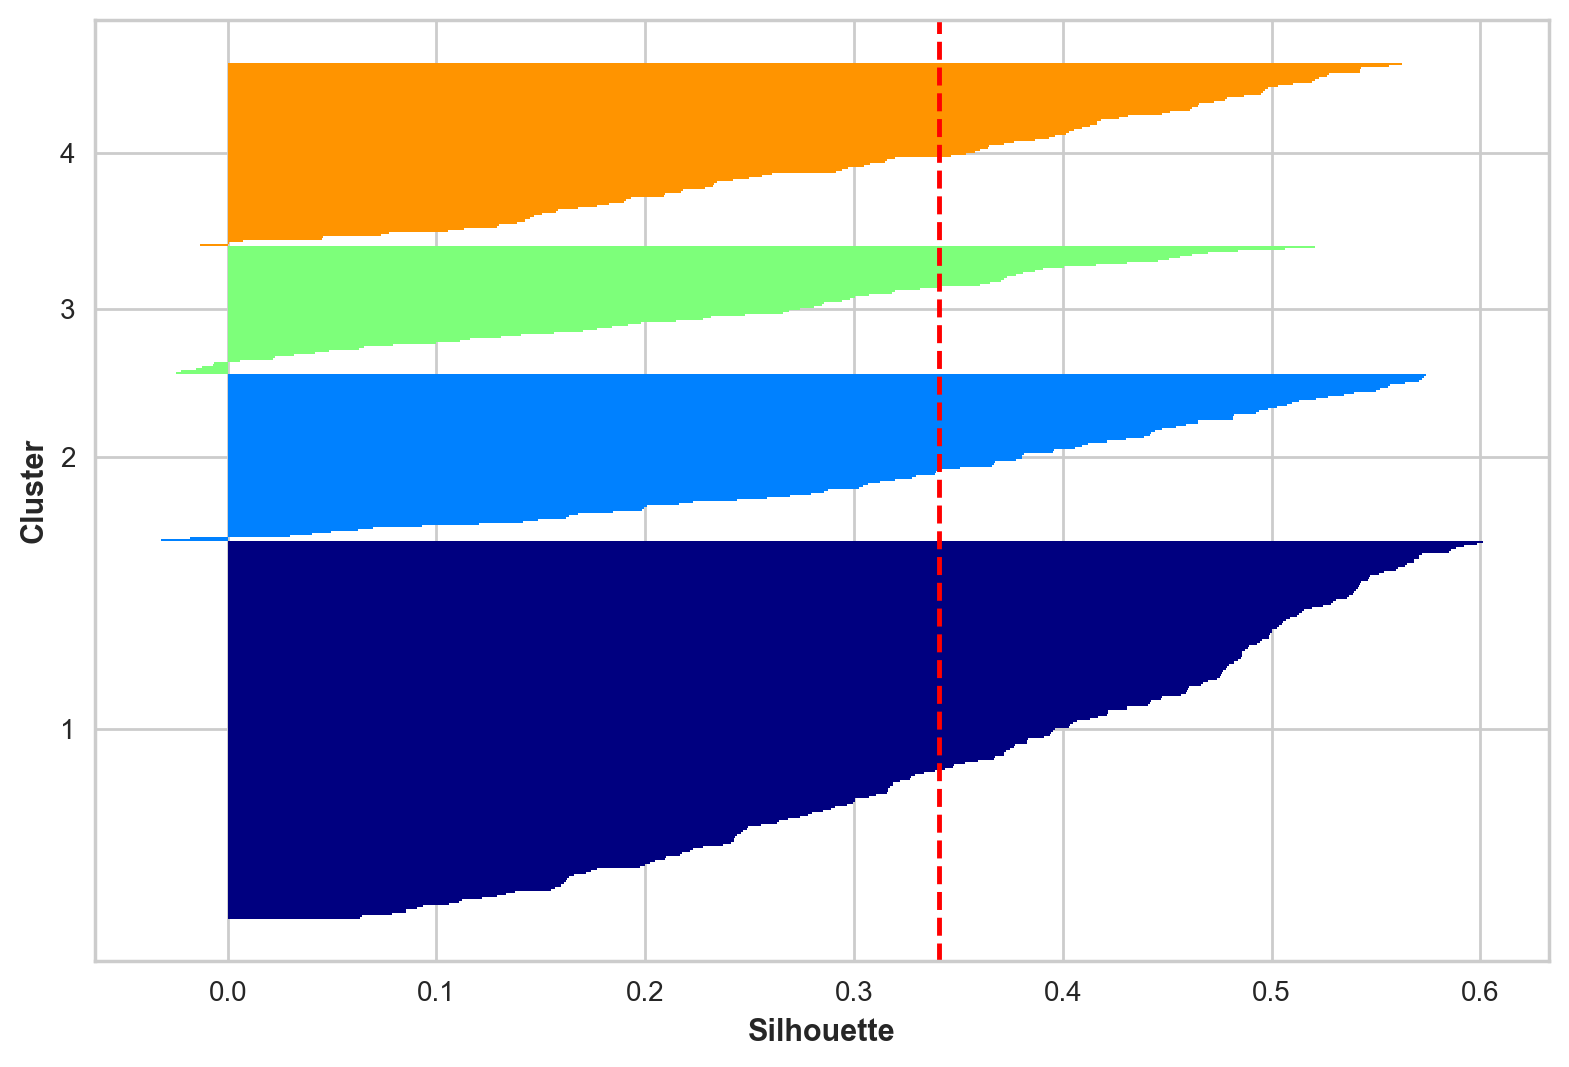

In [21]:
kmeans = KMeans(n_clusters=4,       # 클러스터 개수 4개
                init='k-means++',   # K-means 알고리즘 설정
                max_iter=300,       # 최대 몇번 반복 
                random_state=0)

y_km = kmeans.fit_predict(pca_result)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#실루엣 분석
silhouette_vals = silhouette_samples(pca_result, y_km, metric = 'euclidean')

#시각화
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
             edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#라벨링
pca_result['cluster'] = kmeans.labels_
#실루엣계수 평균값
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette')

plt.tight_layout()
plt.show()

In [22]:
pca_result.head(3)

,0,1,cluster
행정동명,,,
가락1동,0.313751,-0.194982,3
가락2동,0.416137,-0.051024,3
가락본동,0.156997,0.112429,3


In [23]:
for i in range(4):
    print(f"cluster_{i}의 개수: {len(pca_result[pca_result['cluster'] == i].index)}개")

cluster_0의 개수: 188개
cluster_1의 개수: 83개
cluster_2의 개수: 64개
cluster_3의 개수: 91개


<Axes: xlabel='V_0', ylabel='V_1'>

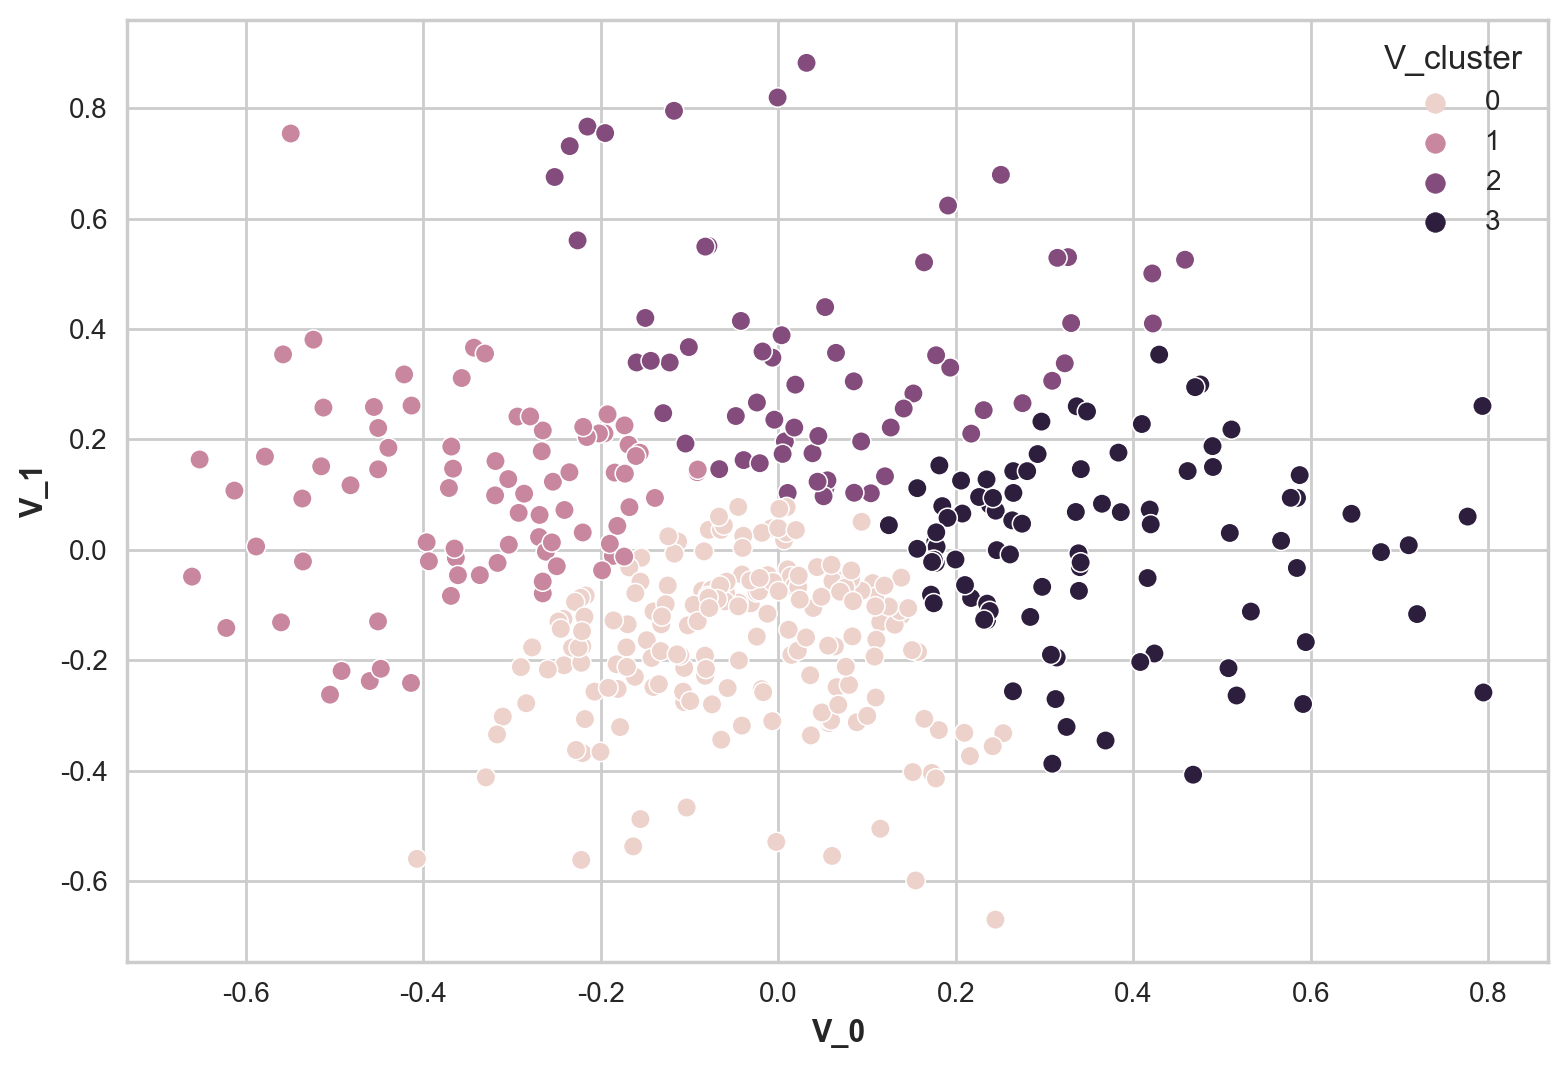

In [24]:
pca_result_T = pca_result.reset_index().copy()

pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]

sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1', hue = 'V_cluster')

In [25]:
# sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_2', hue = 'V_cluster')

ValueError: Could not interpret value `V_2` for parameter `y`

<Axes: xlabel='V_1', ylabel='V_2'>

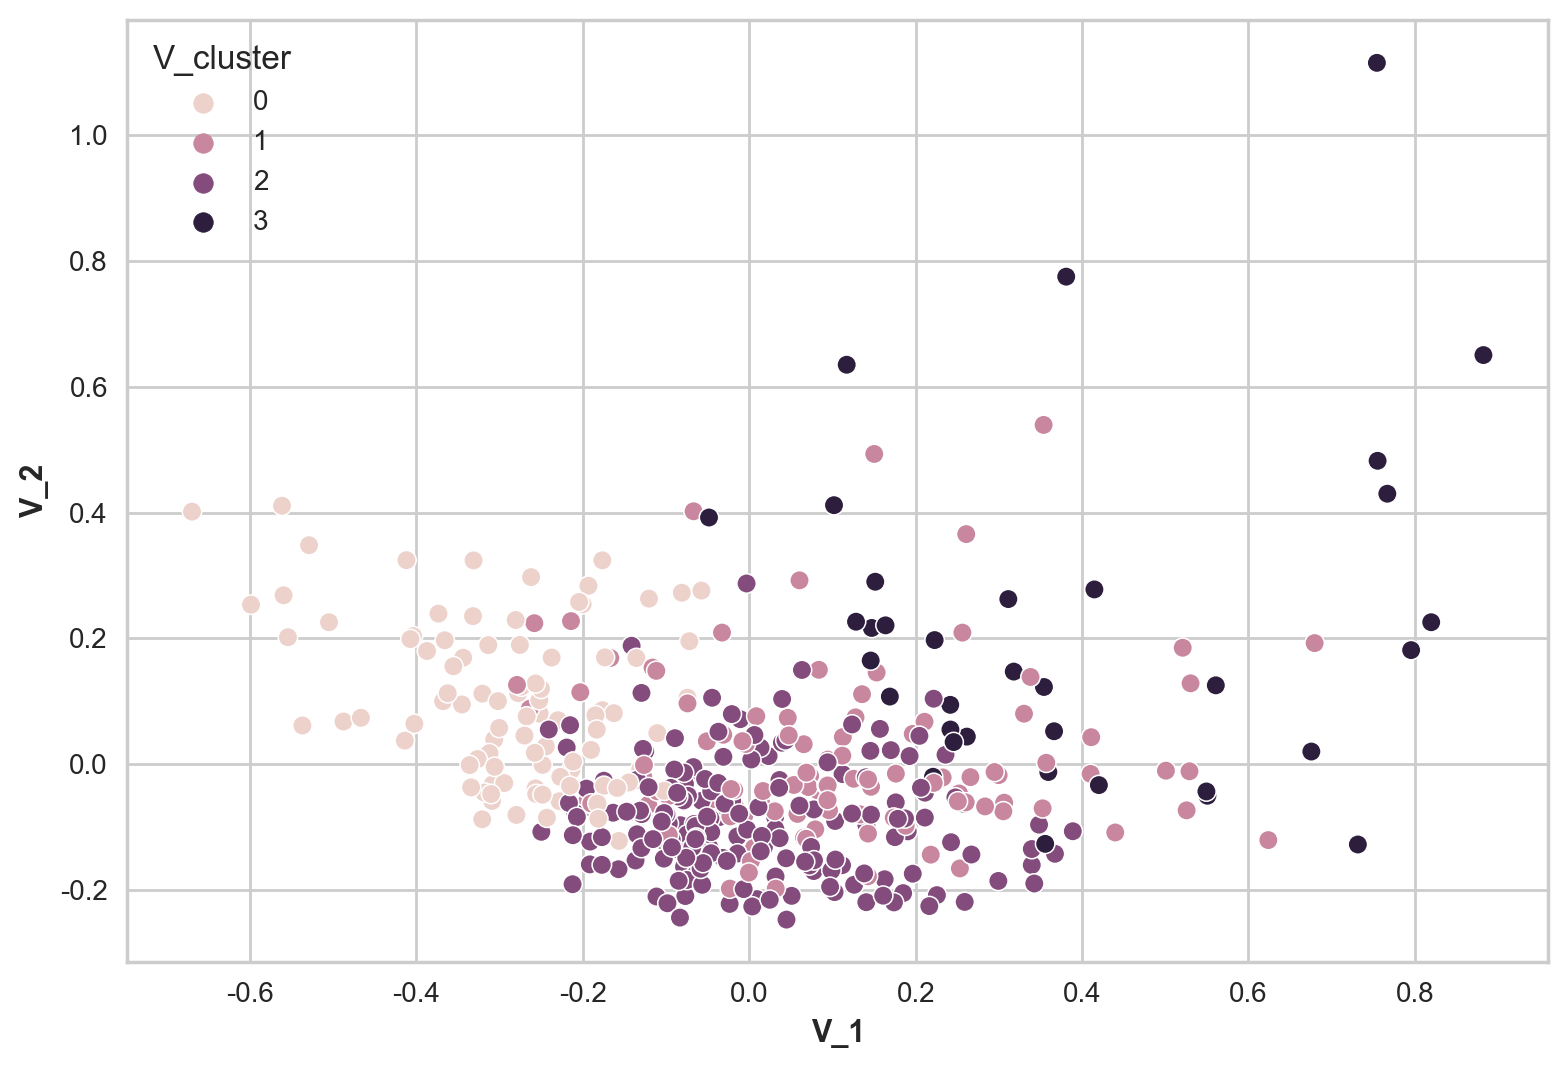

In [26]:
# sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_1', y = 'V_2', hue = 'V_cluster')

In [26]:
# 피처별 순위 계산
def rank(data):
    for col in data.columns:
        data[col] = data[col].rank(ascending=False).astype('int')
    return data

In [27]:
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
cluster_0

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
갈현1동,13.483,4,0.0,75.112311,3.0,0.0,232027.0,40.0,0.000034,29670,0.065723,0.287631,0.302932,0.484775
강일동,32.123,8,2.0,25.810345,3.0,0.0,262007.0,20.0,0.000213,32811,0.110146,0.230715,0.261010,0.274074
개봉1동,17.357,2,0.0,21.166759,4.0,0.0,523111.0,44.0,0.000090,33313,0.065590,0.273017,0.290247,0.366751
개봉2동,17.357,1,0.0,19.521449,0.0,0.0,312685.0,33.0,0.000099,30159,0.069167,0.245565,0.309791,0.285024
개봉3동,17.357,5,0.0,67.893088,3.0,0.0,123892.0,29.0,0.000202,19842,0.066274,0.241105,0.312620,0.330356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍제3동,11.848,4,0.0,17.474265,16.0,1.0,279257.0,29.0,0.000113,35540,0.063647,0.266123,0.306415,0.376653
화곡2동,14.838,3,0.0,69.402534,2.0,0.0,121936.0,18.0,0.000087,34682,0.074102,0.295773,0.256848,0.415496
화곡3동,14.838,5,0.0,7.668980,1.0,0.0,146331.0,41.0,0.000023,42610,0.075053,0.294015,0.290214,0.401745


In [28]:
# 클러스터 0 순위
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_cluster_0 = cluster_0.copy()
ranked_cluster_0 = ranked_cluster_0.rank(ascending=False)
ranked_cluster_0['sum'] = ranked_cluster_0.sum(axis=1).astype('int')
ranked_cluster_0['ranking'] = ranked_cluster_0['sum'].rank(ascending=True)
ranked_cluster_0.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
길동,49.0,44.5,104.0,28.0,3.0,111.0,30.0,12.0,18.0,23.0,166.0,19.0,78.0,22.0,707,1.0
오류2동,16.0,7.5,104.0,144.0,21.5,20.5,48.0,47.0,2.0,70.0,28.0,145.0,68.0,132.0,853,2.0
상계2동,124.0,181.5,104.0,14.0,12.0,20.5,11.0,4.0,85.0,63.0,63.0,91.0,82.0,71.0,926,3.0
월곡2동,23.5,68.5,104.0,52.0,34.0,111.0,98.0,13.5,156.0,67.0,101.0,12.0,92.0,4.0,936,4.0
방배2동,59.5,28.5,104.0,33.0,88.5,5.0,22.0,23.5,178.0,86.0,77.0,56.0,89.0,99.0,949,5.0


In [29]:
# 클러스터 1 순위
cluster_1 = data.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_cluster_1 = cluster_1.copy()
ranked_cluster_1 = ranked_cluster_1.rank(ascending=False)
ranked_cluster_1['sum'] = ranked_cluster_1.sum(axis=1).astype('int')
ranked_cluster_1['ranking'] = ranked_cluster_1['sum'].rank(ascending=True)
ranked_cluster_1.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
종로1.2.3.4가동,1.0,6.0,1.0,44.0,3.5,3.5,1.0,1.0,5.0,67.0,75.0,65.0,6.0,1.0,280,1.0
혜화동,15.0,21.0,45.0,25.0,30.5,58.0,15.0,12.0,28.0,19.0,2.0,22.0,63.0,27.0,382,2.0
광희동,6.0,21.0,5.5,24.0,8.5,25.5,19.0,7.0,77.5,70.0,71.0,14.0,31.0,6.0,386,3.0
동선동,9.0,77.5,45.0,30.0,43.0,13.5,11.0,13.0,14.0,25.0,16.0,5.0,70.0,15.0,387,4.0
사직동,3.5,6.0,45.0,19.0,43.0,13.5,4.0,4.0,32.0,58.0,3.0,68.0,32.0,73.0,404,5.0


In [30]:
# 클러스터 2 순위
cluster_2 = data.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_cluster_2 = cluster_2.copy()
ranked_cluster_2 = ranked_cluster_2.rank(ascending=False)
ranked_cluster_2['sum'] = ranked_cluster_2.sum(axis=1).astype('int')
ranked_cluster_2['ranking'] = ranked_cluster_2['sum'].rank(ascending=True)
ranked_cluster_2.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
화곡1동,37.0,2.0,38.0,22.0,50.0,4.0,22.0,23.0,27.0,2.0,28.0,9.0,6.0,38.0,308,1.0
가양1동,17.0,3.0,38.0,24.0,50.0,1.5,30.0,6.0,29.0,9.0,36.0,10.0,59.0,13.0,325,2.0
신촌동,8.0,42.5,38.0,19.0,27.5,9.0,3.0,5.0,2.0,59.0,45.0,3.0,62.0,3.0,326,3.0
독산1동,46.0,6.5,7.0,47.0,39.0,20.5,17.0,32.5,9.0,2.0,19.0,17.0,30.0,35.0,327,4.0
연희동,61.0,5.0,10.0,33.0,50.0,3.0,5.0,11.0,48.0,8.0,14.0,35.0,29.0,28.0,340,5.0


In [31]:
# 클러스터 3 순위
cluster_3 = data.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_cluster_3 = cluster_3.copy()
ranked_cluster_3 = ranked_cluster_3.rank(ascending=False)
ranked_cluster_3['sum'] = ranked_cluster_3.sum(axis=1).astype('int')
ranked_cluster_3['ranking'] = ranked_cluster_3['sum'].rank(ascending=True)
ranked_cluster_3.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
진관동,16.0,4.0,53.5,54.0,41.0,13.0,4.0,5.5,2.5,5.5,3.0,8.0,7.0,66.0,283,1.0
성산2동,14.0,12.5,14.0,41.0,4.0,13.0,35.0,36.5,43.0,11.0,59.0,2.0,59.0,4.0,348,2.0
공릉1동,33.0,30.0,53.5,12.0,13.0,13.0,55.0,16.0,16.0,19.0,74.0,6.0,28.0,2.0,370,3.0
상암동,42.5,3.0,2.5,7.0,73.5,2.5,3.0,2.0,13.0,46.0,18.0,56.0,74.0,39.0,382,4.0
양재1동,11.0,1.0,53.5,39.0,57.5,67.5,2.0,5.5,7.5,5.5,26.0,46.0,43.0,51.0,416,5.0


In [32]:
print(ranked_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

['길동', '오류2동', '상계2동', '월곡2동', '방배2동']
['종로1.2.3.4가동', '혜화동', '광희동', '동선동', '사직동']
['화곡1동', '가양1동', '신촌동', '독산1동', '연희동']
['진관동', '성산2동', '공릉1동', '상암동', '양재1동']


In [33]:
areas = ranked_cluster_0.sort_values('ranking').head(5).index.to_list()
areas.extend(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

In [34]:
result_df = data.copy()
result_df = result_df.loc[areas]
result_df

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
길동,17.327,5,0.0,150.963203,15.0,0.0,288559.0,69.0,0.000179,44808,0.059141,0.304722,0.284525,0.464401
오류2동,34.714,9,0.0,13.821674,5.0,1.0,247964.0,42.0,0.000318,37708,0.105415,0.236395,0.291185,0.322479
상계2동,14.719,0,0.0,239.523296,7.0,1.0,419371.0,113.0,0.000103,38810,0.085493,0.265241,0.281525,0.398998
월곡2동,27.697,4,0.0,85.748843,4.0,0.0,193005.0,64.0,0.000052,38206,0.073863,0.319374,0.274564,0.505611
방배2동,17.205,6,0.0,133.009747,2.0,2.0,316242.0,54.0,0.000027,36394,0.081387,0.278178,0.276529,0.364834
종로1.2.3.4가동,343.590,6,11.0,71.699557,8.0,5.0,1910857.0,324.0,0.000224,13400,0.030448,0.285821,0.366716,0.801009
혜화동,71.088,3,0.0,157.123176,3.0,0.0,470420.0,116.0,0.000125,32116,0.078715,0.395877,0.224748,0.625966
광희동,129.972,3,1.0,159.140077,6.0,1.0,412314.0,135.0,0.000000,11362,0.034325,0.415948,0.278824,0.725238
동선동,112.874,0,0.0,124.757538,2.0,2.0,511138.0,113.0,0.000200,30036,0.061859,0.465974,0.199294,0.691281


In [60]:
result_df.to_csv('./data/result_1023.csv')

클러스터별 통계량 비교하기

In [53]:
cluster_0.describe().astype('float')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,20.014894,3.515957,0.154255,79.366994,2.537234,0.234043,213587.813830,32.367021,0.000104,33876.446809,0.082779,0.260715,0.273570,0.358285
std,15.414114,2.586423,0.498804,118.170331,2.872271,0.610523,118251.156559,23.546708,0.000057,9276.646104,0.026360,0.035928,0.046704,0.090560
min,11.848000,0.000000,0.000000,1.287593,0.000000,0.000000,22966.000000,1.000000,0.000000,9200.000000,0.049759,0.129380,0.130440,0.078523
25%,14.218750,2.000000,0.000000,15.684675,1.000000,0.000000,138449.750000,17.000000,0.000065,26675.500000,0.064917,0.239507,0.243758,0.298452
50%,15.493000,3.000000,0.000000,40.976450,2.000000,0.000000,193925.500000,26.500000,0.000096,35564.000000,0.075747,0.262226,0.272078,0.370279
75%,17.327000,5.000000,0.000000,88.918927,3.000000,0.000000,248362.250000,42.000000,0.000138,40534.000000,0.093781,0.281101,0.304844,0.418733
max,118.479000,14.000000,3.000000,996.190369,20.000000,5.000000,680504.000000,152.000000,0.000349,51676.000000,0.223722,0.342607,0.401541,0.534305


In [54]:
cluster_1.describe().astype('float')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,41.830964,2.313253,0.228916,119.424416,2.771084,1.168675,3.021495e+05,62.265060,0.000111,23351.493976,0.048817,0.335360,0.259566,0.592402
std,54.943074,2.029825,1.262260,135.109886,2.952160,3.604940,2.633565e+05,52.219071,0.000082,9384.866385,0.016399,0.093232,0.072946,0.083345
min,12.345000,0.000000,0.000000,3.158879,0.000000,0.000000,5.239100e+04,0.000000,0.000000,9200.000000,0.000543,0.001957,0.001739,0.440222
25%,14.244000,1.000000,0.000000,26.846189,1.000000,0.000000,1.399200e+05,29.000000,0.000063,14826.000000,0.039888,0.302054,0.226216,0.522335
50%,16.773000,2.000000,0.000000,73.800398,2.000000,0.000000,2.309550e+05,43.000000,0.000099,23722.000000,0.049038,0.337017,0.263017,0.575087
75%,48.468500,3.000000,0.000000,166.173304,4.000000,1.000000,3.945370e+05,83.500000,0.000153,30726.000000,0.057797,0.398146,0.296661,0.659593
max,343.590000,11.000000,11.000000,677.350068,20.000000,31.000000,1.910857e+06,324.000000,0.000435,39556.000000,0.120295,0.536942,0.459634,0.801009


In [55]:
cluster_2.describe().astype('float')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,27.984313,5.078125,0.515625,67.871943,6.062500,0.859375,5.294635e+05,87.421875,0.000057,52993.156250,0.052466,0.399219,0.238521,0.589248
std,27.689050,3.133560,1.532631,62.794835,10.718438,1.520935,3.187345e+05,72.524064,0.000034,11293.062271,0.012814,0.091969,0.052619,0.099526
min,12.345000,0.000000,0.000000,3.524124,0.000000,0.000000,1.630090e+05,21.000000,0.000000,34328.000000,0.022066,0.240608,0.119441,0.450917
25%,14.245000,3.000000,0.000000,22.247126,2.000000,0.000000,2.775245e+05,43.750000,0.000029,45852.500000,0.043628,0.327567,0.209235,0.522215
50%,16.116500,5.000000,0.000000,47.145612,4.000000,0.000000,4.223690e+05,69.000000,0.000052,49165.000000,0.053109,0.384305,0.233086,0.556523
75%,30.806500,6.250000,0.000000,98.252289,7.000000,1.000000,7.003542e+05,92.000000,0.000077,58315.500000,0.060003,0.453813,0.274764,0.641706
max,150.959000,19.000000,10.000000,349.040680,86.000000,7.000000,1.696882e+06,406.000000,0.000156,80894.000000,0.084800,0.664557,0.357041,0.857793


In [56]:
cluster_3.describe().astype('float')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,20.080857,6.868132,0.340659,43.268688,3.538462,0.824176,3.650267e+05,57.714286,0.000088,62312.494505,0.097695,0.265951,0.250353,0.343829
std,15.087801,4.497428,0.819482,39.884336,3.287375,1.225592,2.014953e+05,37.927793,0.000039,10470.146862,0.033569,0.037712,0.048513,0.096063
min,11.848000,0.000000,0.000000,0.986333,0.000000,0.000000,1.312770e+05,14.000000,0.000018,36920.000000,0.055391,0.179623,0.144411,0.132038
25%,13.996000,4.000000,0.000000,16.342819,1.000000,0.000000,2.428125e+05,37.000000,0.000055,55170.000000,0.072956,0.242237,0.218516,0.294873
50%,14.838000,6.000000,0.000000,32.447097,3.000000,0.000000,3.248330e+05,50.000000,0.000088,59922.000000,0.087417,0.269167,0.252586,0.363659
75%,16.666500,9.000000,0.000000,55.828123,5.000000,1.000000,4.297870e+05,69.500000,0.000110,69740.000000,0.116370,0.291266,0.286374,0.414211
max,100.640000,26.000000,3.000000,205.761715,18.000000,8.000000,1.631757e+06,302.000000,0.000226,80894.000000,0.199636,0.355947,0.363388,0.512132


min_max 스케일링된 데이터로 랭킹 구하기

In [39]:
scaled_cluster_0 = scaled_df.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_scaled_cluster_0 = scaled_cluster_0.copy()
ranked_scaled_cluster_0.columns = data.columns
ranked_scaled_cluster_0['sum'] = ranked_scaled_cluster_0.sum(axis=1)
ranked_scaled_cluster_0['ranking'] = ranked_scaled_cluster_0['sum'].rank(ascending=False)
ranked_scaled_cluster_0.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
오류2동,0.068927,0.346154,0.0,0.012897,0.058140,0.032258,0.119180,0.103448,0.731940,0.397634,0.469901,0.353816,0.632122,0.313057,3.639475,1.0
개포3동,0.114037,0.153846,0.0,1.000000,0.000000,0.000000,0.024656,0.036946,0.404242,0.109758,0.433850,0.358588,0.615843,0.341025,3.592791,2.0
길동,0.016516,0.192308,0.0,0.150700,0.174419,0.000000,0.140682,0.169951,0.410641,0.496666,0.262560,0.456936,0.617578,0.495179,3.584135,3.0
명일2동,0.016516,0.076923,0.0,0.477318,0.023256,0.000000,0.048038,0.100985,0.801859,0.111725,0.616430,0.351066,0.527522,0.245873,3.397511,4.0
방화3동,0.013393,0.346154,0.0,0.172012,0.000000,0.032258,0.019146,0.064039,0.310853,0.490892,0.277547,0.369300,0.754867,0.506617,3.357079,5.0


In [40]:
scaled_cluster_1 = scaled_df.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_scaled_cluster_1 = scaled_cluster_1.copy()
ranked_scaled_cluster_1.columns = data.columns
ranked_scaled_cluster_1['sum'] = ranked_scaled_cluster_1.sum(axis=1)
ranked_scaled_cluster_1['ranking'] = ranked_scaled_cluster_1['sum'].rank(ascending=False)
ranked_scaled_cluster_1.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
종로1.2.3.4가동,1.000000,0.230769,1.0,0.071054,0.093023,0.161290,1.000000,0.798030,0.514925,0.058582,0.133993,0.428410,0.797076,0.927132,7.214284,1.0
명동,0.785713,0.307692,0.0,0.163768,0.034884,1.000000,0.428661,0.564039,0.250000,0.000000,0.127116,0.226053,0.455297,0.794360,5.137583,2.0
동선동,0.304532,0.000000,0.0,0.124368,0.023256,0.064516,0.258581,0.278325,0.459449,0.290624,0.274738,0.700298,0.431442,0.786324,3.996451,3.0
사직동,0.392856,0.230769,0.0,0.171835,0.023256,0.064516,0.403101,0.359606,0.253053,0.125227,0.324905,0.412830,0.603870,0.546921,3.912746,4.0
필동,0.357142,0.038462,0.0,0.177094,0.011628,0.064516,0.099713,0.184729,1.000000,0.000000,0.189457,0.460964,0.555472,0.763791,3.902966,5.0


In [41]:
scaled_cluster_2 = scaled_df.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_scaled_cluster_2 = scaled_cluster_2.copy()
ranked_scaled_cluster_2.columns = data.columns
ranked_scaled_cluster_2['sum'] = ranked_scaled_cluster_2.sum(axis=1)
ranked_scaled_cluster_2['ranking'] = ranked_scaled_cluster_2['sum'].rank(ascending=False)
ranked_scaled_cluster_2.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
서교동,0.098311,0.269231,0.0,0.078437,0.023256,0.000000,0.886659,1.000000,0.142227,0.548358,0.193367,0.708502,0.408458,0.766423,5.123229,1.0
신촌동,0.154894,0.153846,0.0,0.092077,0.058140,0.064516,0.609668,0.549261,0.339116,0.439284,0.204347,0.900553,0.311546,0.925271,4.802519,2.0
영등포동,0.419335,0.153846,0.0,0.058186,0.058140,0.000000,0.587774,0.322660,0.151336,0.719614,0.121980,0.812274,0.362557,0.886833,4.654535,3.0
가양1동,0.056767,0.461538,0.0,0.076893,0.023256,0.225806,0.228031,0.536946,0.134980,0.822356,0.226998,0.740069,0.349175,0.768318,4.651134,4.0
화곡1동,0.009013,0.500000,0.0,0.083646,0.023256,0.096774,0.313130,0.197044,0.142161,1.000000,0.244604,0.740997,0.688678,0.595046,4.634351,5.0


In [42]:
scaled_cluster_3 = scaled_df.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_scaled_cluster_3 = scaled_cluster_3.copy()
ranked_scaled_cluster_3.columns = data.columns
ranked_scaled_cluster_3['sum'] = ranked_scaled_cluster_3.sum(axis=1)
ranked_scaled_cluster_3['ranking'] = ranked_scaled_cluster_3['sum'].rank(ascending=False)
ranked_scaled_cluster_3.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
진관동,0.020175,0.615385,0.000000,0.026992,0.034884,0.064516,0.360631,0.280788,0.398052,1.000000,0.791082,0.477193,0.682847,0.292459,5.045004,1.0
양재1동,0.058292,1.000000,0.000000,0.036686,0.023256,0.000000,0.488580,0.280788,0.341187,1.000000,0.489318,0.403276,0.566165,0.352300,5.039847,2.0
상암동,0.010526,0.692308,0.272727,0.121237,0.011628,0.129032,0.431241,0.371921,0.307066,0.707479,0.569451,0.389548,0.444850,0.377943,4.836957,3.0
여의동,0.014846,0.153846,0.000000,0.080705,0.046512,0.064516,0.852163,0.743842,0.246970,0.780958,0.405565,0.370934,0.585880,0.307461,4.654198,4.0
세곡동,0.112584,0.846154,0.181818,0.033648,0.011628,0.032258,0.232514,0.130542,0.520303,0.488256,0.509445,0.397249,0.491477,0.364031,4.351907,5.0


In [43]:
print(ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

['오류2동', '개포3동', '길동', '명일2동', '방화3동']
['종로1.2.3.4가동', '명동', '동선동', '사직동', '필동']
['서교동', '신촌동', '영등포동', '가양1동', '화곡1동']
['진관동', '양재1동', '상암동', '여의동', '세곡동']


In [44]:
scaled_areas = ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list()
scaled_areas.extend(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

In [45]:
scaled_result_df = data.copy()
scaled_result_df = scaled_result_df.loc[scaled_areas]
scaled_result_df

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
오류2동,34.714,9,0.0,13.821674,5.0,1.0,247964.0,42.0,0.000318,37708,0.105415,0.236395,0.291185,0.322479
개포3동,49.679,4,0.0,996.190369,0.0,0.0,69514.0,15.0,0.000176,17069,0.097370,0.239557,0.283731,0.344273
길동,17.327,5,0.0,150.963203,15.0,0.0,288559.0,69.0,0.000179,44808,0.059141,0.304722,0.284525,0.464401
명일2동,17.327,2,0.0,476.014744,2.0,0.0,113657.0,41.0,0.000349,17210,0.138117,0.234573,0.243289,0.270125
방화3동,16.291,9,0.0,172.173625,0.0,1.0,59112.0,26.0,0.000135,44394,0.062486,0.246655,0.347389,0.473314
종로1.2.3.4가동,343.590,6,11.0,71.699557,8.0,5.0,1910857.0,324.0,0.000224,13400,0.030448,0.285821,0.366716,0.801009
명동,272.502,8,0.0,163.968537,3.0,31.0,832232.0,229.0,0.000109,9200,0.028913,0.151739,0.210217,0.697544
동선동,112.874,0,0.0,124.757538,2.0,2.0,511138.0,113.0,0.000200,30036,0.061859,0.465974,0.199294,0.691281
사직동,142.175,6,0.0,171.997150,2.0,2.0,783977.0,146.0,0.000110,18178,0.073055,0.275498,0.278248,0.504722


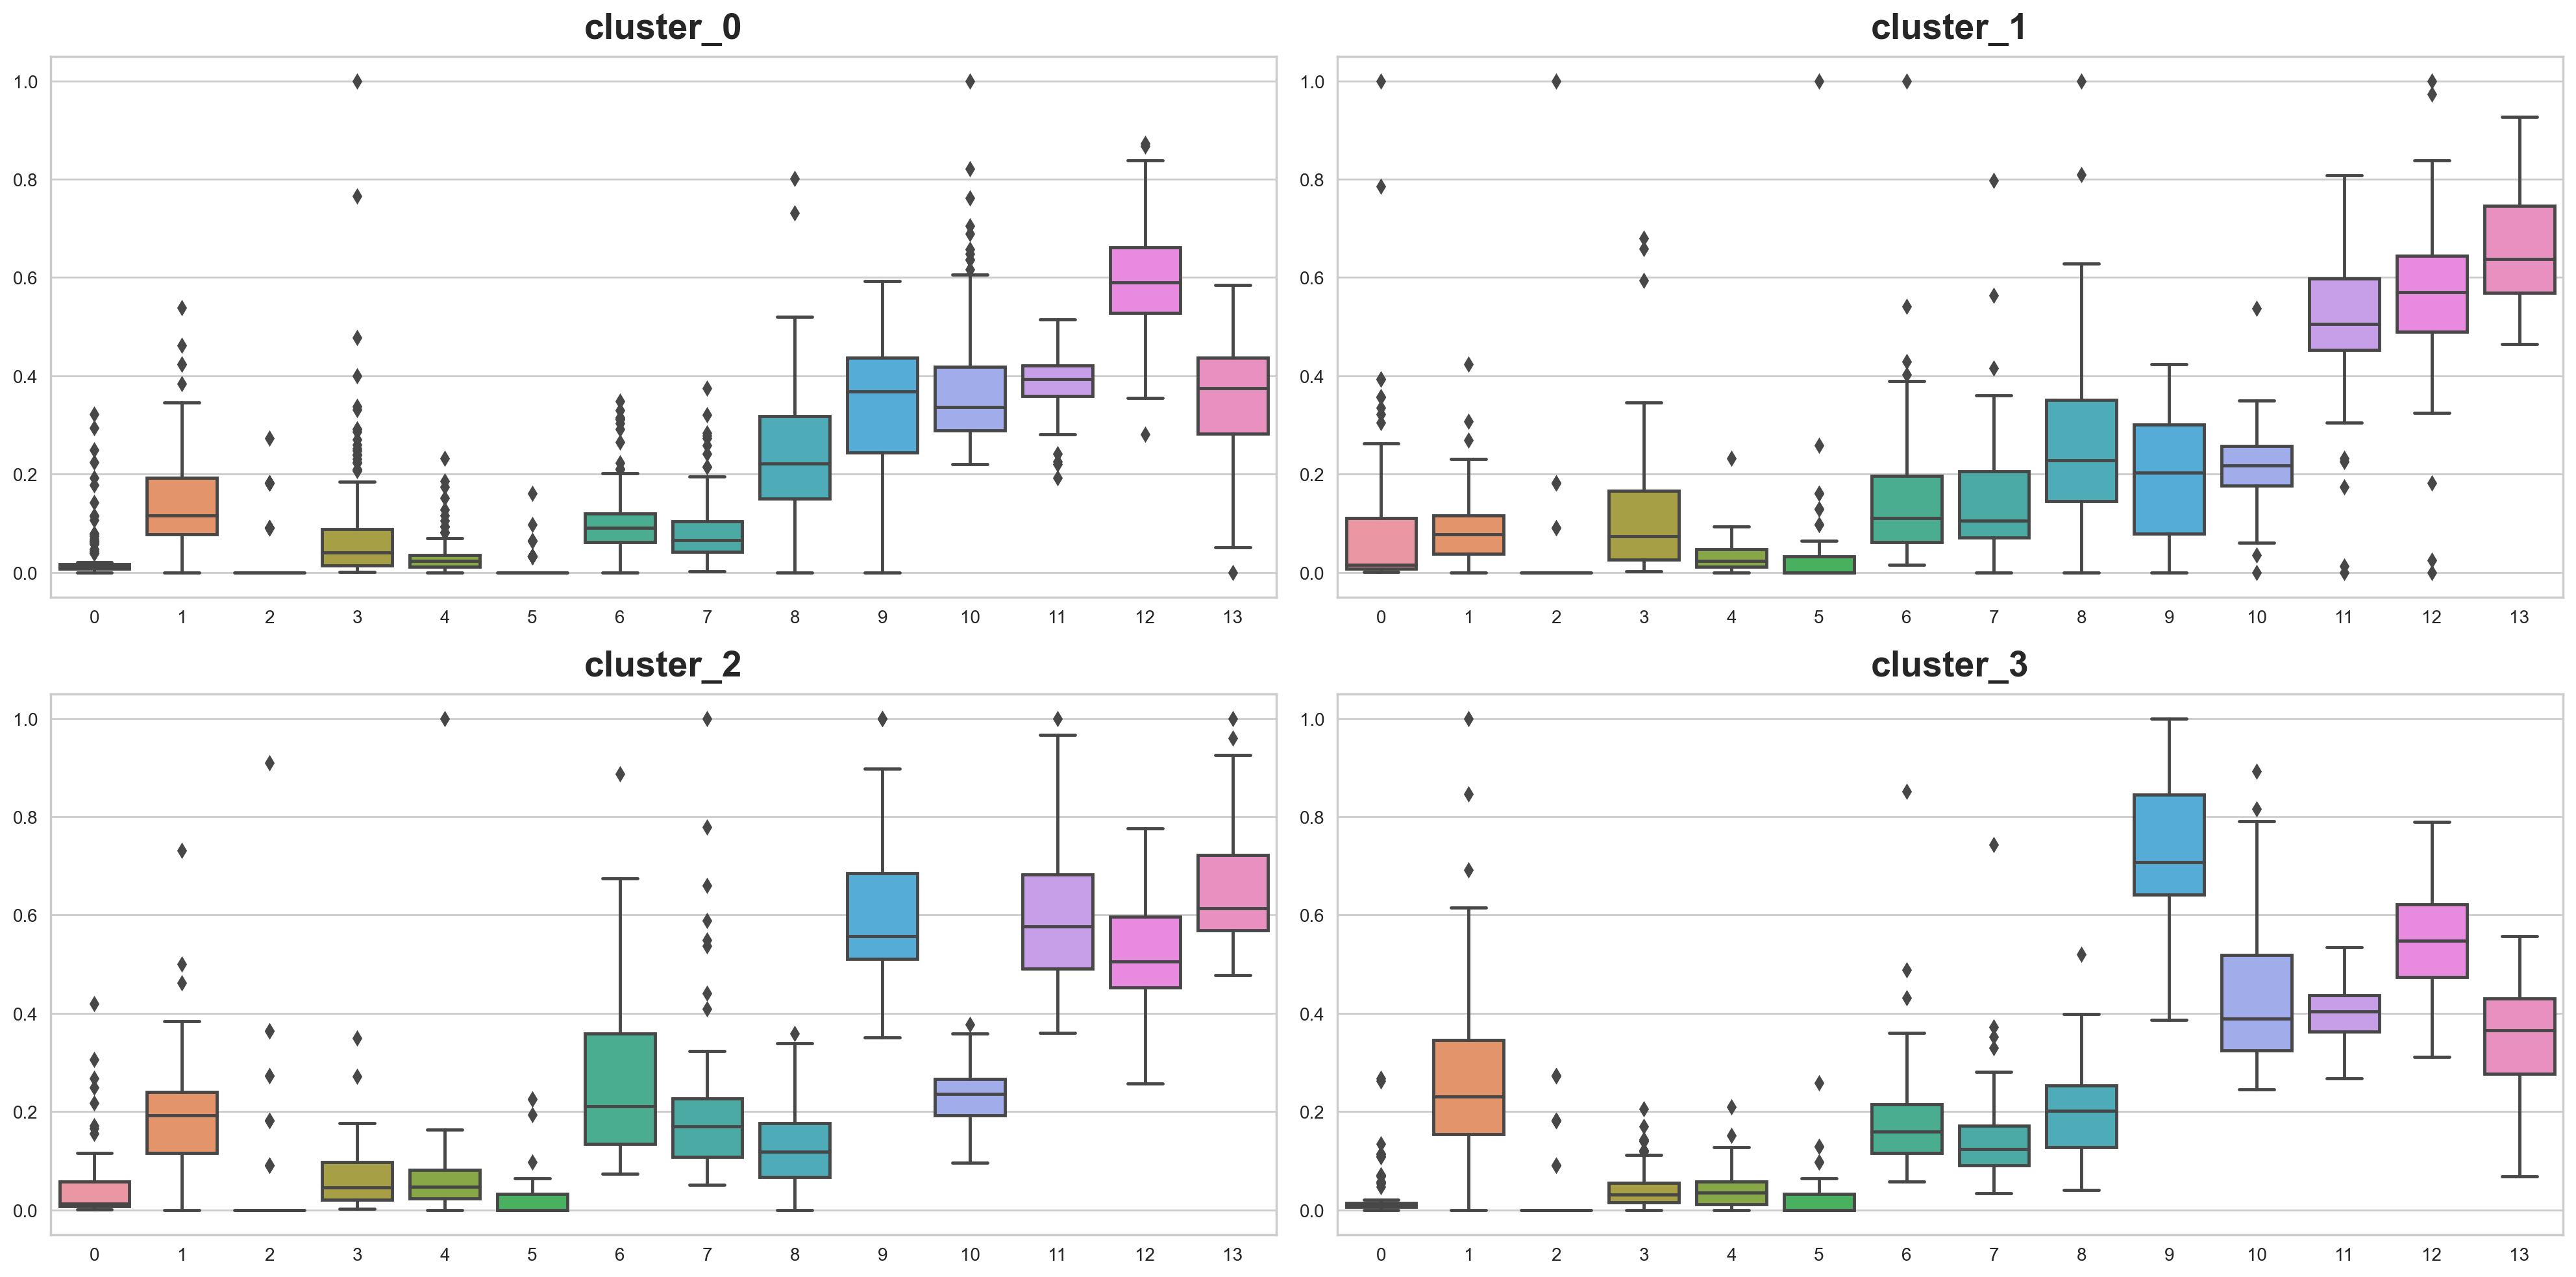

In [79]:
fig , axes = plt.subplots(nrows=2 ,ncols=2,
                          figsize=(20,10) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()
sns.boxplot(data=scaled_cluster_0, ax = ax[0])
ax[0].set_title("cluster_0", fontsize= 20)

sns.boxplot(data=scaled_cluster_1, ax = ax[1])
ax[1].set_title("cluster_1", fontsize= 20)

sns.boxplot(data=scaled_cluster_2, ax = ax[2])
ax[2].set_title("cluster_2", fontsize= 20)

sns.boxplot(data=scaled_cluster_3, ax = ax[3])
ax[3].set_title("cluster_3", fontsize= 20)

plt.show()